# Reproduction of Ainslie & Leighton (2009) Figures 2 and 5

This notebook reproduces **Figure 2** and **Figure 5** from:

> Ainslie, M. A., & Leighton, T. G. (2009). *Near resonant bubble acoustic cross-section corrections, including examples from oceanography, volcanology, and biomedical ultrasound*. Journal of the Acoustical Society of America, 126(5), 2163-2175.


The paper compares three different formulations for bubble scattering cross-sections:

- **Equation 43 (Corrected Form, AL)**: Near-resonance corrections
- **Equation 45 (Wildt-Medwin, WM)**
- **Equation 46 (Andreeva-Weston, AW)**

## Figures

- **Figure 2**: Zero damping case comparing WM vs Corrected Form, AW is identical to AL.
- **Figure 5**: Finite damping case comparing all three equations

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({
    "figure.dpi": 180,
    "font.family": "serif",
    "font.serif": ["Aptos"],
    "axes.labelsize": 15,
    "font.size": 14,
    "legend.fontsize": 14,
    "axes.linewidth": 2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "grid.alpha": 0.35,
})

## Theoretical Equations

### Dimensionless Correction Factor

$$\epsilon = \frac{\omega R_0}{c}$$

where:
- $\omega$ = angular frequency
- $R_0$ = bubble radius
- $c$ = sound speed in water

In [4]:
def epsilon(omega, R0, c): 
    """Dimensionless correction factor ε = ωR₀/c"""
    return (omega * R0) / c

### Equation 45: Wildt-Medwin (WM) Model

$$\sigma_{WM} = \frac{4\pi R_0^2}{\left(\frac{\omega_0^2}{\omega^2} - 1\right)^2 + \left(\frac{2\beta_0}{\omega} + \epsilon\right)^2}$$

In [5]:
def sigma_WM_eq45(omega, omega0, beta0, eps, R0):
    """Equation 45: Wildt-Medwin model"""
    real = (omega0**2 / omega**2) - 1.0
    imag = 2.0*(beta0/omega) + eps
    den = real**2 + imag**2
    return (4*np.pi*R0**2) / den

### Equation 46: Andreeva-Weston (AW) Model

$$\sigma_{AW} = \frac{4\pi R_0^2}{\left(\frac{\omega_0^2}{\omega^2} - 1\right)^2 + \left(\frac{2\beta_0}{\omega} + \frac{\omega_0^2}{\omega^2}\epsilon\right)^2}$$

In [6]:
def sigma_AW_eq46(omega, omega0, beta0, eps, R0):
    """Equation 46: Andreeva-Weston model"""
    real = (omega0**2 / omega**2) - 1.0
    imag = 2.0*(beta0/omega) + (omega0**2/omega**2)*eps
    den = real**2 + imag**2
    return (4*np.pi*R0**2) / den

### Equation 43: Corrected Form

$$\sigma_{corrected} = \frac{4\pi R_0^2}{\left(\frac{\omega_0^2}{\omega^2} - 1 - \frac{2\beta_0}{\omega}\epsilon\right)^2 + \left(\frac{2\beta_0}{\omega} + \frac{\omega_0^2}{\omega^2}\epsilon\right)^2}$$

This includes near-resonance corrections in both real and imaginary parts.

In [7]:
def sigma_corr_eq43(omega, omega0, beta0, eps, R0):
    """Equation 43: Corrected form with near-resonance corrections"""
    real = (omega0**2 / omega**2) - 1.0 - 2.0*(beta0/omega)*eps
    imag = 2.0*(beta0/omega) + (omega0**2/omega**2)*eps
    den = real**2 + imag**2
    return (4*np.pi*R0**2) / den

## Figure Plot Functions

In [8]:
def find_resonance_ratio(frequency, sigma):
    """Find the frequency ratio at maximum scattering cross-section"""
    return frequency[np.argmax(sigma)]

def plot_ainslie_leighton_figures(eps0=0.3, bbar=0.15, c=1500, f0=1000):
    """
    Plot Figures 2 and 5 from Ainslie & Leighton (2009)
    
    Parameters:
    -----------
    eps0 : float
        Dimensionless parameter ε₀ = ω₀R₀/c (default: 0.3)
    bbar : float  
        Damping parameter β̄ = β₀/ω₀ (default: 0.15)
    c : float
        Sound speed in water (m/s) (default: 1500)
    f0 : float
        Reference frequency (Hz) (default: 1000)
    """
    
    # Calculate derived parameters
    ω0 = 2*np.pi*f0  # Angular frequency
    R0 = eps0 * c / ω0  # Bubble radius
    ω = np.linspace(0.7*ω0, 1.3*ω0, 6000)  # Frequency range
    b0 = bbar * ω0  # Damping coefficient
    ε = epsilon(ω, R0, c)  # Dimensionless correction
    norm = 4*np.pi*R0**2  # Normalization factor
    
    print(f"Bubble parameters:")
    print(f"  ε₀ = {eps0}")
    print(f"  R₀ = {R0*1e6:.1f} μm")
    print(f"  f₀ = {f0} Hz")
    print(f"  c = {c} m/s")
    print(f"  Damping: 2β₀/ω₀ = {2*bbar:.2f}")
    
    return ω, ω0, b0, ε, R0, norm

## Parameters and Setup

In [9]:
# Set up parameters (matching paper values)
eps0 = 0.3  # Dimensionless parameter
bbar = 0.15  # Damping parameter for Figure 5
c = 1500  # Sound speed (m/s)
f0 = 1000  # Reference frequency (Hz)

ω, ω0, b0, ε, R0, norm = plot_ainslie_leighton_figures(eps0, bbar, c, f0)

Bubble parameters:
  ε₀ = 0.3
  R₀ = 71619.7 μm
  f₀ = 1000 Hz
  c = 1500 m/s
  Damping: 2β₀/ω₀ = 0.30


## Figure 2: Zero Damping Case

This figure compares the **Wildt-Medwin (Eq. 45)** and **Corrected Form (Eq. 43)** under zero damping conditions (2β₀/ω₀ = 0).

<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\o'
/var/folders/4c/txq1qmcs2pg0fygb8lrsf4r40000gp/T/ipykernel_85875/576646423.py:18: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f"Figure 2: Zero Damping ($\epsilon_0={eps0}$, $2\\beta_0/\omega_0=0$)", fontsize=14)
/var/folders/4c/txq1qmcs2pg0fygb8lrsf4r40000gp/T/ipykernel_85875/576646423.py:18: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f"Figure 2: Zero Damping ($\epsilon_0={eps0}$, $2\\beta_0/\omega_0=0$)", fontsize=14)
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found becau

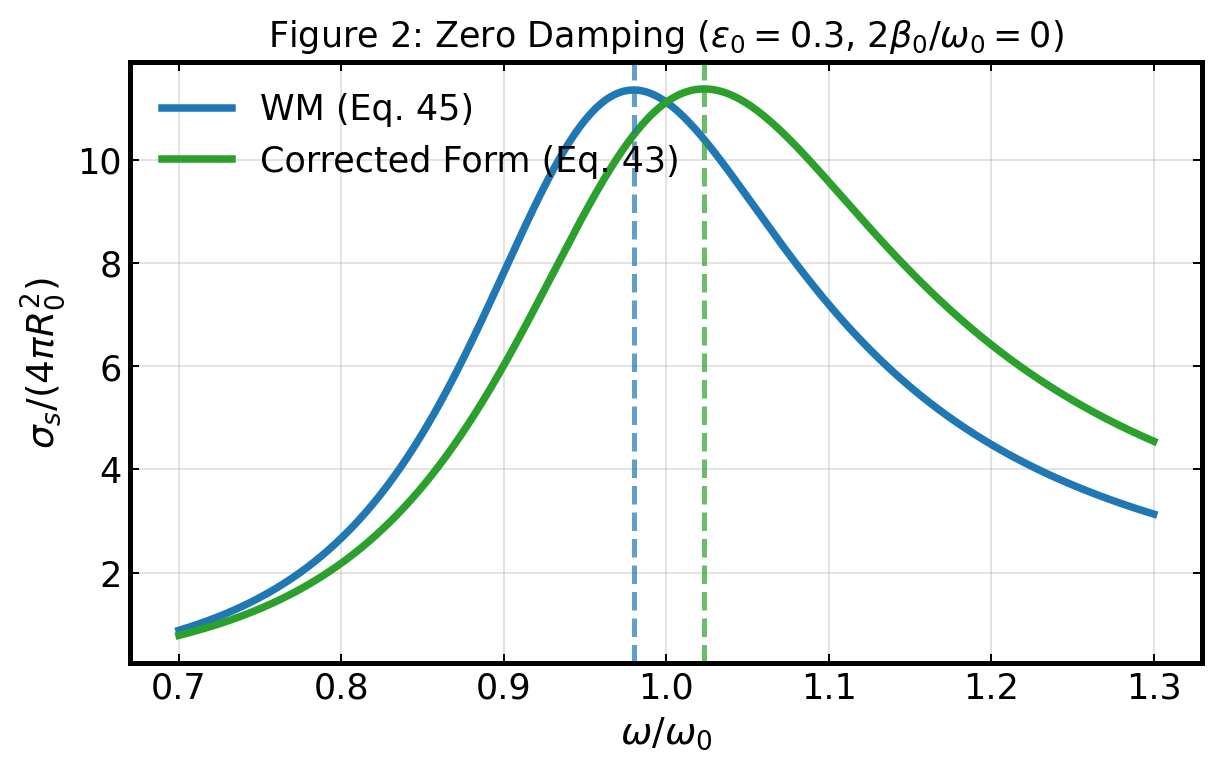

Resonance frequencies (Figure 2):
  WM (Eq. 45): ω/ω₀ = 0.9798
  Corrected (Eq. 43): ω/ω₀ = 1.0233
  Frequency shift: 4.34%


In [10]:
# Figure 2: Zero damping (2β₀/ω₀ = 0)
s45_fig2 = sigma_WM_eq45(ω, ω0, 0, ε, R0) / norm
s43_fig2 = sigma_corr_eq43(ω, ω0, 0, ε, R0) / norm

# Find resonance frequencies
r45_fig2 = find_resonance_ratio(ω, s45_fig2) / ω0
r43_fig2 = find_resonance_ratio(ω, s43_fig2) / ω0

plt.figure(figsize=(7, 4.5))
plt.plot(ω/ω0, s45_fig2, label="WM (Eq. 45)", lw=3, color="tab:blue")
plt.plot(ω/ω0, s43_fig2, label="Corrected Form (Eq. 43)", lw=3, color="tab:green")
plt.axvline(r45_fig2, ls="--", color="tab:blue", lw=2, alpha=0.7)
plt.axvline(r43_fig2, ls="--", color="tab:green", lw=2, alpha=0.7)

plt.grid(True, which="both")
plt.xlabel(r"$\omega / \omega_0$")
plt.ylabel(r"$\sigma_s / (4\pi R_0^2)$")
plt.title(f"Figure 2: Zero Damping ($\epsilon_0={eps0}$, $2\\beta_0/\omega_0=0$)", fontsize=14)
plt.legend(frameon=False, loc="upper left")
plt.tight_layout()
plt.show()

print(f"Resonance frequencies (Figure 2):")
print(f"  WM (Eq. 45): ω/ω₀ = {r45_fig2:.4f}")
print(f"  Corrected (Eq. 43): ω/ω₀ = {r43_fig2:.4f}")
print(f"  Frequency shift: {(r43_fig2-r45_fig2)*100:.2f}%")

## Figure 5: Finite Damping Case

This figure shows all three equations under finite damping conditions (2β₀/ω₀ = 0.3):
- **Wildt-Medwin (Eq. 45)** - solid blue
- **Andreeva-Weston (Eq. 46)** - solid orange  
- **Corrected Form (Eq. 43)** - dashed green

<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\o'
/var/folders/4c/txq1qmcs2pg0fygb8lrsf4r40000gp/T/ipykernel_85875/2052512381.py:24: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f"Figure 5: Finite Damping ($\epsilon_0={eps0}$, $2\\beta_0/\omega_0={2*bbar:.2f}$)", fontsize=14)
/var/folders/4c/txq1qmcs2pg0fygb8lrsf4r40000gp/T/ipykernel_85875/2052512381.py:24: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f"Figure 5: Finite Damping ($\epsilon_0={eps0}$, $2\\beta_0/\omega_0={2*bbar:.2f}$)", fontsize=14)
findfont: Generic family 'serif' not found because none of the following families were found: Aptos


findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos
findfont: Generic family 'serif' not found because none of the following families were found: Aptos


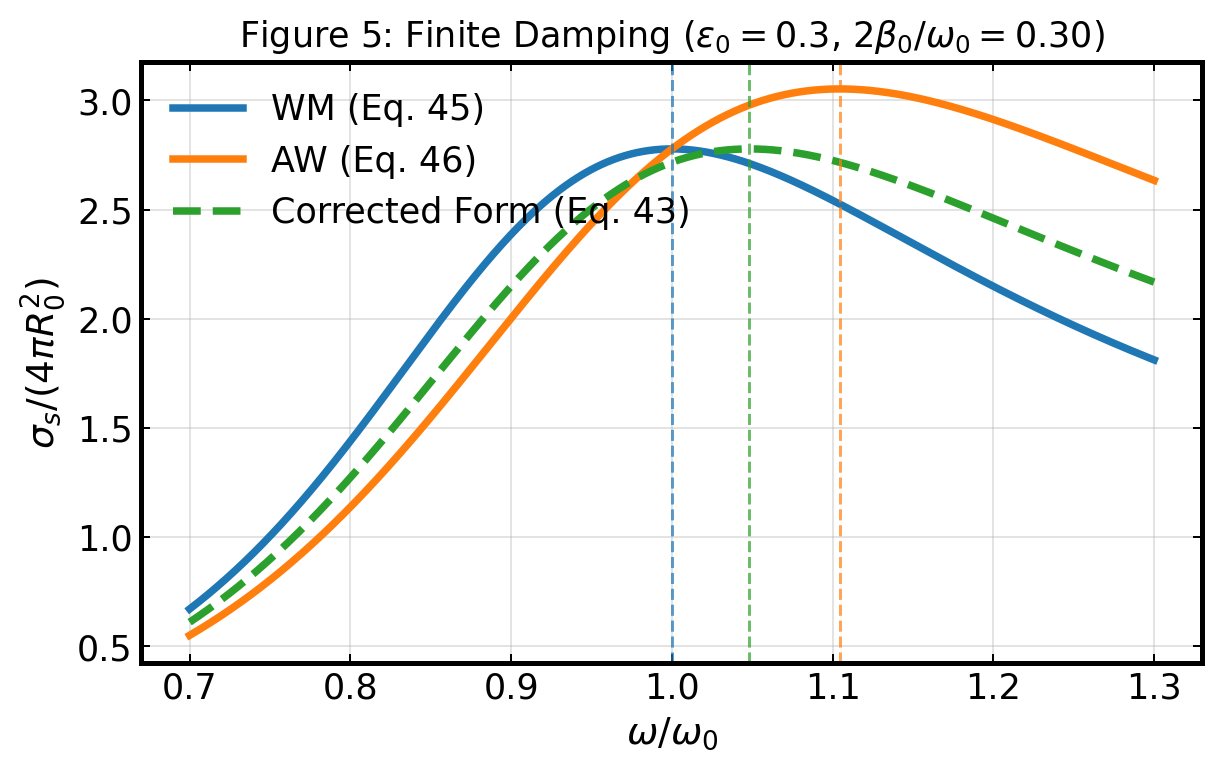

Resonance frequencies (Figure 5):
  WM (Eq. 45): ω/ω₀ = 1.0001
  AW (Eq. 46): ω/ω₀ = 1.1043
  Corrected (Eq. 43): ω/ω₀ = 1.0483


In [11]:
# Figure 5: Finite damping (2β₀/ω₀ = 0.3)
s45_fig5 = sigma_WM_eq45(ω, ω0, b0, ε, R0) / norm
s46_fig5 = sigma_AW_eq46(ω, ω0, b0, ε, R0) / norm
s43_fig5 = sigma_corr_eq43(ω, ω0, b0, ε, R0) / norm

# Find resonance frequencies
r45_fig5 = find_resonance_ratio(ω, s45_fig5) / ω0
r46_fig5 = find_resonance_ratio(ω, s46_fig5) / ω0
r43_fig5 = find_resonance_ratio(ω, s43_fig5) / ω0

plt.figure(figsize=(7, 4.5))
plt.plot(ω/ω0, s45_fig5, label="WM (Eq. 45)", lw=3, color="tab:blue")
plt.plot(ω/ω0, s46_fig5, label="AW (Eq. 46)", lw=3, color="tab:orange")
plt.plot(ω/ω0, s43_fig5, "--", label="Corrected Form (Eq. 43)", lw=3, color="tab:green")

# Add resonance frequency markers
resonance_data = [(r45_fig5, "tab:blue", "WM"), (r46_fig5, "tab:orange", "AW"), (r43_fig5, "tab:green", "Eq.43")]
for x, col, lbl in resonance_data:
    plt.axvline(x, ls="--", color=col, lw=1.2, alpha=0.7)

plt.grid(True, which="both")
plt.xlabel(r"$\omega / \omega_0$")
plt.ylabel(r"$\sigma_s / (4\pi R_0^2)$")
plt.title(f"Figure 5: Finite Damping ($\epsilon_0={eps0}$, $2\\beta_0/\omega_0={2*bbar:.2f}$)", fontsize=14)
plt.legend(frameon=False, loc="upper left")
plt.tight_layout()
plt.show()

print(f"Resonance frequencies (Figure 5):")
print(f"  WM (Eq. 45): ω/ω₀ = {r45_fig5:.4f}")
print(f"  AW (Eq. 46): ω/ω₀ = {r46_fig5:.4f}")
print(f"  Corrected (Eq. 43): ω/ω₀ = {r43_fig5:.4f}")

## Peak Values Comparison

In [12]:
print("=" * 60)
print("PEAK SCATTERING CROSS-SECTION VALUES")
print("=" * 60)
print()
print("Figure 2 (Zero Damping):")
print(f"  WM (Eq. 45): σₛ/(4πR₀²) = {s45_fig2.max():.2f}")
print(f"  Corrected (Eq. 43): σₛ/(4πR₀²) = {s43_fig2.max():.2f}")
print()
print("Figure 5 (Finite Damping):")
print(f"  WM (Eq. 45): σₛ/(4πR₀²) = {s45_fig5.max():.3f}")
print(f"  AW (Eq. 46): σₛ/(4πR₀²) = {s46_fig5.max():.3f}")
print(f"  Corrected (Eq. 43): σₛ/(4πR₀²) = {s43_fig5.max():.3f}")
print()
print("Peak reduction due to damping:")
print(f"  WM: {(1 - s45_fig5.max()/s45_fig2.max())*100:.1f}% reduction")
print(f"  Corrected: {(1 - s43_fig5.max()/s43_fig2.max())*100:.1f}% reduction")
print("=" * 60)

PEAK SCATTERING CROSS-SECTION VALUES

Figure 2 (Zero Damping):
  WM (Eq. 45): σₛ/(4πR₀²) = 11.35
  Corrected (Eq. 43): σₛ/(4πR₀²) = 11.37

Figure 5 (Finite Damping):
  WM (Eq. 45): σₛ/(4πR₀²) = 2.778
  AW (Eq. 46): σₛ/(4πR₀²) = 3.053
  Corrected (Eq. 43): σₛ/(4πR₀²) = 2.778

Peak reduction due to damping:
  WM: 75.5% reduction
  Corrected: 75.6% reduction
